## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap XMAS scan (insane)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [4]:
directory = '/home/USER/notebooks/pcaps/nmap_xmas_scan_insane'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [5]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.062469
Name: time, dtype: float64

In [6]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [7]:
scan_times
#duration_list

0    0.062469
1    0.071826
2    0.058314
3    0.069492
4    0.065073
5    0.069867
6    0.066655
7    0.065498
8    0.061621
9    0.064221
Name: Scan times, dtype: float64

In [8]:
temp = pd.DataFrame(duration_list)

In [9]:
temp.mean()

0    0.065504
dtype: float64

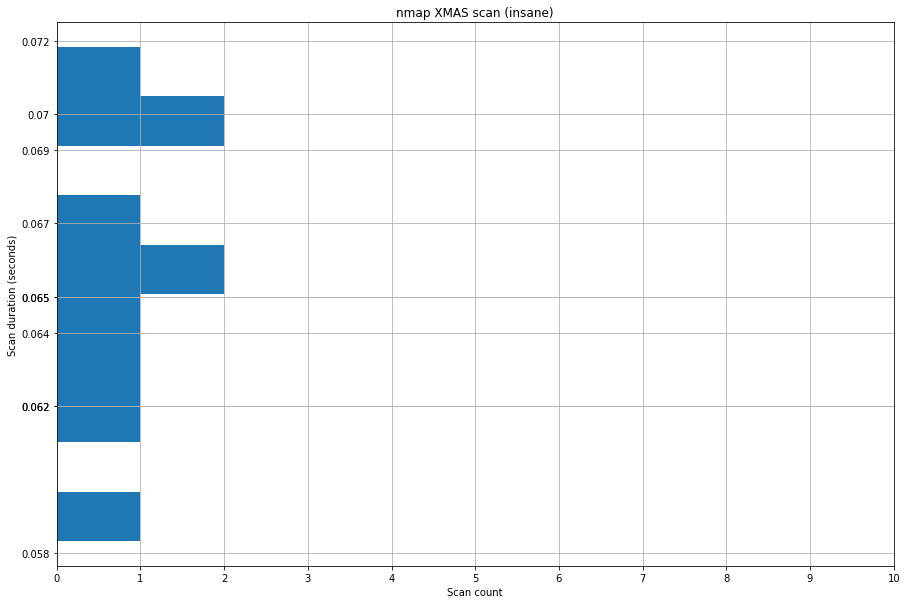

In [10]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [11]:
temp.describe()

,0
count,10.000000
mean,0.065504
std,0.004137
min,0.058314
25%,0.062907
50%,0.065285
75%,0.068783
max,0.071826


## Packet count

In [12]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [13]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [14]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1310.0719451904297



## Order of ports scanned


In [15]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 44755 113
2 44755 5900
3 44755 139
4 44755 110
5 44755 53
6 44755 8080
7 44755 995
8 44755 80
9 44755 256
10 44755 21
11 44755 1723
12 44755 1025
13 44755 143
14 44755 445
15 44755 22
16 44755 3389
17 44755 587
18 44755 135
19 44755 23
20 44755 111
21 44755 3306
22 44755 993
23 44755 1720
24 44755 554
25 44755 25
26 44755 443
27 44755 199
28 44755 8888
29 44755 1057
30 44755 880
31 44755 6699
32 44755 1060
33 44755 8192
34 44755 5911
35 44755 18040
36 44755 1099
37 44755 1011
38 44755 51493
39 44755 5903
40 44755 42
41 44755 44176
42 44755 1056
43 44755 9500
44 44755 2399
45 44755 1169
46 44755 7007
47 44755 1417
48 44755 100
49 44755 902
50 44755 9998
51 44755 1091
52 44755 9040
53 44755 999
54 44755 6901
55 44755 8254
56 44755 7402
57 44755 481
58 44755 5901
59 44755 3918
60 44755 749
61 44755 1055
62 44755 5987
63 44755 1840
64 44755 515
65 44755 4550
66 44755 49999
67 44755 3300
68 44755 903
69 44755 2001
70 44755 50636
71 44755 1322
72 44755 3527
73 44755 2038
74 44755 55056
75 

610 44755 2179
611 44755 1719
612 44755 5100
613 44755 4445
614 44755 62078
615 44755 19
616 44755 10621
617 44755 5960
618 44755 3998
619 44755 5902
620 44755 2135
621 44755 2710
622 44755 543
623 44755 2383
624 44755 6001
625 44755 1641
626 44755 5925
627 44755 1092
628 44755 7019
629 44755 1083
630 44755 912
631 44755 3517
632 44755 1064
633 44755 5060
634 44755 17877
635 44755 8181
636 44755 3351
637 44755 30718
638 44755 64623
639 44755 19315
640 44755 631
641 44755 7004
642 44755 3766
643 44755 49400
644 44755 711
645 44755 3322
646 44755 6101
647 44755 9999
648 44755 49157
649 44755 6646
650 44755 1124
651 44755 1163
652 44755 1287
653 44755 2007
654 44755 88
655 44755 1501
656 44755 32782
657 44755 44443
658 44755 21571
659 44755 6666
660 44755 1900
661 44755 5910
662 44755 2968
663 44755 34572
664 44755 45100
665 44755 1974
666 44755 3814
667 44755 5080
668 44755 8600
669 44755 2006
670 44755 1666
671 44755 3369
672 44755 3851
673 44755 3889
674 44755 20
675 44755 1166
676 447

629 64676 843
630 64676 1040
631 64676 19801
632 64676 26
633 64676 5959
634 64676 1029
635 64676 44442
636 64676 2811
637 64676 9000
638 64676 32770
639 64676 990
640 64676 5033
641 64676 6667
642 64676 1030
643 64676 8193
644 64676 84
645 64676 28201
646 64676 44176
647 64676 30951
648 64676 50300
649 64676 16992
650 64676 8084
651 64676 8652
652 64676 7741
653 64676 1719
654 64676 2035
655 64676 9595
656 64676 9001
657 64676 2068
658 64676 1104
659 64676 306
660 64676 8500
661 64676 65389
662 64676 9944
663 64676 3322
664 64676 5911
665 64676 3325
666 64676 3920
667 64676 1218
668 64676 3737
669 64676 1045
670 64676 50636
671 64676 5679
672 64676 55056
673 64676 2013
674 64676 2100
675 64676 34571
676 64676 2605
677 64676 17988
678 64676 1076
679 64676 631
680 64676 4000
681 64676 8290
682 64676 1055
683 64676 1059
684 64676 8300
685 64676 2500
686 64676 9010
687 64676 2103
688 64676 5815
689 64676 146
690 64676 32782
691 64676 777
692 64676 7103
693 64676 1009
694 64676 27353
695 6

185 48981 1185
186 48981 4045
187 48981 2702
188 48981 6346
189 48981 7100
190 48981 3
191 48981 3476
192 48981 1049
193 48981 3546
194 48981 43
195 48981 1236
196 48981 2492
197 48981 1079
198 48981 1052
199 48981 9009
200 48981 5801
201 48981 7103
202 48981 5030
203 48981 1087
204 48981 7106
205 48981 32784
206 48981 8654
207 48981 1037
208 48981 5631
209 48981 5054
210 48981 6567
211 48981 5440
212 48981 58080
213 48981 8800
214 48981 3689
215 48981 8042
216 48981 3001
217 48981 464
218 48981 5510
219 48981 6003
220 48981 2800
221 48981 4321
222 48981 55056
223 48981 1111
224 48981 524
225 48981 6502
226 48981 2111
227 48981 6004
228 48981 32785
229 48981 625
230 48981 32772
231 48981 808
232 48981 1310
233 48981 5051
234 48981 7402
235 48981 16993
236 48981 1999
237 48981 19801
238 48981 6112
239 48981 16080
240 48981 3690
241 48981 1641
242 48981 5989
243 48981 1113
244 48981 5911
245 48981 5922
246 48981 5633
247 48981 1065
248 48981 1862
249 48981 14442
250 48981 1433
251 48981 

736 48981 83
737 48981 8192
738 48981 3006
739 48981 16992
740 48981 25734
741 48981 2045
742 48981 8383
743 48981 5730
744 48981 1300
745 48981 57797
746 48981 1063
747 48981 2049
748 48981 1051
749 48981 3011
750 48981 683
751 48981 6792
752 48981 1166
753 48981 3918
754 48981 7070
755 48981 1187
756 48981 1277
757 48981 1666
758 48981 9207
759 48981 9877
760 48981 3737
761 48981 8000
762 48981 64623
763 48981 7911
764 48981 5718
765 48981 3030
766 48981 6669
767 48981 1069
768 48981 514
769 48981 1296
770 48981 40911
771 48981 880
772 48981 406
773 48981 7777
774 48981 1028
775 48981 2119
776 48981 1334
777 48981 6788
778 48981 6689
779 48981 3971
780 48981 2034
781 48981 79
782 48981 16113
783 48981 1812
784 48981 14441
785 48981 497
786 48981 15000
787 48981 481
788 48981 90
789 48981 2048
790 48981 6666
791 48981 82
792 48981 2126
793 48981 1580
794 48981 49
795 48981 9002
796 48981 1186
797 48981 9594
798 48981 1247
799 48981 8292
800 48981 1521
801 48981 12265
802 48981 16016
8

884 54120 6059
885 54120 13456
886 54120 7777
887 54120 144
888 54120 6646
889 54120 45100
890 54120 19350
891 54120 5810
892 54120 513
893 54120 6839
894 54120 49156
895 54120 1875
896 54120 4444
897 54120 32773
898 54120 7001
899 54120 3030
900 54120 1187
901 54120 65389
902 54120 70
903 54120 7100
904 54120 2288
905 54120 1174
906 54120 14442
907 54120 1521
908 54120 2909
909 54120 8081
910 54120 1064
911 54120 3322
912 54120 1755
913 54120 17877
914 54120 1533
915 54120 2522
916 54120 1322
917 54120 56737
918 54120 9900
919 54120 2100
920 54120 873
921 54120 8022
922 54120 17988
923 54120 711
924 54120 3880
925 54120 7201
926 54120 10025
927 54120 13722
928 54120 1075
929 54120 65000
930 54120 6100
931 54120 1163
932 54120 37
933 54120 777
934 54120 1236
935 54120 31337
936 54120 57797
937 54120 9618
938 54120 2047
939 54120 2260
940 54120 625
941 54120 1185
942 54120 3077
943 54120 1141
944 54120 2222
945 54120 1070
946 54120 1085
947 54120 901
948 54120 9535
949 54120 33
950 5412

442 41384 1201
443 41384 32782
444 41384 1058
445 41384 49156
446 41384 1117
447 41384 444
448 41384 8292
449 41384 2869
450 41384 49157
451 41384 900
452 41384 1096
453 41384 10621
454 41384 9917
455 41384 2191
456 41384 3404
457 41384 1183
458 41384 49165
459 41384 6566
460 41384 6565
461 41384 7100
462 41384 6789
463 41384 32774
464 41384 2001
465 41384 3703
466 41384 8001
467 41384 4900
468 41384 7004
469 41384 1112
470 41384 5566
471 41384 7201
472 41384 16001
473 41384 8701
474 41384 9290
475 41384 5988
476 41384 1034
477 41384 873
478 41384 3517
479 41384 2366
480 41384 2010
481 41384 2701
482 41384 4003
483 41384 5221
484 41384 1717
485 41384 82
486 41384 3880
487 41384 3300
488 41384 222
489 41384 22939
490 41384 10001
491 41384 1247
492 41384 1122
493 41384 1600
494 41384 49176
495 41384 1216
496 41384 13722
497 41384 2401
498 41384 3493
499 41384 8093
500 41384 8333
501 41384 255
502 41384 777
503 41384 3918
504 41384 7999
505 41384 1031
506 41384 43
507 41384 5902
508 41384

91 37922 3971
92 37922 1078
93 37922 144
94 37922 54045
95 37922 6789
96 37922 8300
97 37922 19350
98 37922 255
99 37922 2043
100 37922 5802
101 37922 49161
102 37922 911
103 37922 32769
104 37922 119
105 37922 1248
106 37922 32782
107 37922 617
108 37922 7627
109 37922 2035
110 37922 1084
111 37922 9503
112 37922 79
113 37922 880
114 37922 81
115 37922 1310
116 37922 5950
117 37922 4006
118 37922 1107
119 37922 5989
120 37922 3324
121 37922 722
122 37922 8084
123 37922 1259
124 37922 3011
125 37922 1030
126 37922 27715
127 37922 5904
128 37922 2007
129 37922 41511
130 37922 20005
131 37922 3784
132 37922 25735
133 37922 636
134 37922 2393
135 37922 1068
136 37922 8100
137 37922 4
138 37922 8290
139 37922 1074
140 37922 901
141 37922 1098
142 37922 5952
143 37922 2601
144 37922 161
145 37922 60020
146 37922 1277
147 37922 7201
148 37922 3261
149 37922 4449
150 37922 9877
151 37922 55056
152 37922 1433
153 37922 1114
154 37922 2998
155 37922 3766
156 37922 5054
157 37922 4129
158 37922 

275 33525 8090
276 33525 6025
277 33525 32784
278 33525 9418
279 33525 3703
280 33525 1031
281 33525 5002
282 33525 1096
283 33525 4000
284 33525 54328
285 33525 425
286 33525 5050
287 33525 33354
288 33525 6112
289 33525 1131
290 33525 9900
291 33525 903
292 33525 1094
293 33525 787
294 33525 465
295 33525 5925
296 33525 1033
297 33525 8443
298 33525 1461
299 33525 9207
300 33525 1046
301 33525 56737
302 33525 5544
303 33525 9917
304 33525 9103
305 33525 2717
306 33525 444
307 33525 2013
308 33525 9290
309 33525 10626
310 33525 33
311 33525 7920
312 33525 49163
313 33525 981
314 33525 2288
315 33525 2009
316 33525 27356
317 33525 2107
318 33525 32769
319 33525 10621
320 33525 5801
321 33525 7676
322 33525 5190
323 33525 1104
324 33525 3517
325 33525 255
326 33525 4848
327 33525 902
328 33525 13
329 33525 3889
330 33525 9968
331 33525 7103
332 33525 3995
333 33525 8081
334 33525 999
335 33525 44501
336 33525 416
337 33525 9040
338 33525 1023
339 33525 1068
340 33525 3168
341 33525 26
3

941 33525 1501
942 33525 2968
943 33525 1088
944 33525 4279
945 33525 1494
946 33525 33899
947 33525 1783
948 33525 1084
949 33525 9485
950 33525 1050
951 33525 31038
952 33525 9999
953 33525 800
954 33525 19780
955 33525 44443
956 33525 777
957 33525 705
958 33525 3801
959 33525 146
960 33525 2701
961 33525 8652
962 33525 30000
963 33525 1277
964 33525 9877
965 33525 5800
966 33525 61532
967 33525 2103
968 33525 2607
969 33525 5961
970 33525 1043
971 33525 2809
972 33525 1042
973 33525 1166
974 33525 10004
975 33525 4242
976 33525 9593
977 33525 306
978 33525 2034
979 33525 4550
980 33525 99
981 33525 3986
982 33525 1533
983 33525 9
984 33525 3826
985 33525 1056
986 33525 7800
987 33525 5850
988 33525 911
989 33525 687
990 33525 1244
991 33525 6000
992 33525 8292
993 33525 1007
994 33525 5004
995 33525 3371
996 33525 21571
997 33525 2200
998 33525 20031
999 33525 8500
1000 33525 22939
1 35373 53
2 35373 22
3 35373 3306
4 35373 1720
5 35373 23
6 35373 110
7 35373 443
8 35373 80
9 35373

608 35373 5051
609 35373 15002
610 35373 6123
611 35373 7937
612 35373 3371
613 35373 1218
614 35373 7676
615 35373 668
616 35373 5061
617 35373 15000
618 35373 1078
619 35373 4001
620 35373 15742
621 35373 2394
622 35373 3971
623 35373 49400
624 35373 9917
625 35373 61532
626 35373 1126
627 35373 5825
628 35373 2557
629 35373 3869
630 35373 70
631 35373 1433
632 35373 7007
633 35373 1165
634 35373 2492
635 35373 2607
636 35373 544
637 35373 1062
638 35373 5730
639 35373 2040
640 35373 45100
641 35373 1998
642 35373 1046
643 35373 9103
644 35373 52848
645 35373 42
646 35373 1309
647 35373 9943
648 35373 3
649 35373 500
650 35373 3517
651 35373 2393
652 35373 10001
653 35373 1217
654 35373 6156
655 35373 119
656 35373 7103
657 35373 683
658 35373 8089
659 35373 4446
660 35373 1063
661 35373 32778
662 35373 3370
663 35373 2004
664 35373 8011
665 35373 5405
666 35373 1169
667 35373 3372
668 35373 55600
669 35373 3801
670 35373 33899
671 35373 8500
672 35373 9968
673 35373 1053
674 35373 2

274 40878 4446
275 40878 4343
276 40878 52673
277 40878 45100
278 40878 32777
279 40878 8087
280 40878 1301
281 40878 5061
282 40878 54328
283 40878 1035
284 40878 2301
285 40878 3998
286 40878 18040
287 40878 88
288 40878 631
289 40878 3851
290 40878 34571
291 40878 44176
292 40878 880
293 40878 4662
294 40878 1036
295 40878 700
296 40878 5030
297 40878 2967
298 40878 3301
299 40878 2800
300 40878 34572
301 40878 1137
302 40878 2000
303 40878 514
304 40878 8292
305 40878 9207
306 40878 5907
307 40878 3371
308 40878 90
309 40878 5631
310 40878 2068
311 40878 3404
312 40878 1974
313 40878 3971
314 40878 8011
315 40878 5925
316 40878 4445
317 40878 1064
318 40878 1244
319 40878 5431
320 40878 8083
321 40878 49157
322 40878 6547
323 40878 30718
324 40878 19780
325 40878 7496
326 40878 9010
327 40878 16016
328 40878 1641
329 40878 720
330 40878 3827
331 40878 9
332 40878 5915
333 40878 3476
334 40878 1149
335 40878 1093
336 40878 8001
337 40878 787
338 40878 9878
339 40878 3077
340 40878 5

941 40878 14442
942 40878 668
943 40878 16080
944 40878 1875
945 40878 6006
946 40878 4998
947 40878 1700
948 40878 264
949 40878 10778
950 40878 32772
951 40878 1719
952 40878 2161
953 40878 9040
954 40878 1556
955 40878 2968
956 40878 2725
957 40878 1417
958 40878 7000
959 40878 2119
960 40878 11110
961 40878 427
962 40878 65129
963 40878 50001
964 40878 7741
965 40878 3580
966 40878 49161
967 40878 2811
968 40878 1138
969 40878 3071
970 40878 49154
971 40878 1023
972 40878 1126
973 40878 1152
974 40878 1092
975 40878 1024
976 40878 1094
977 40878 1011
978 40878 1999
979 40878 512
980 40878 2022
981 40878 12174
982 40878 1217
983 40878 1083
984 40878 1001
985 40878 55055
986 40878 2525
987 40878 7103
988 40878 1111
989 40878 8022
990 40878 32
991 40878 12345
992 40878 1027
993 40878 1074
994 40878 5633
995 40878 2001
996 40878 2875
997 40878 5432
998 40878 3826
999 40878 6003
1000 40878 15004
1 57397 80
2 57397 199
3 57397 445
4 57397 8080
5 57397 3389
6 57397 1723
7 57397 995
8 5739

607 57397 6565
608 57397 5850
609 57397 41511
610 57397 1066
611 57397 5906
612 57397 13
613 57397 666
614 57397 1088
615 57397 19283
616 57397 2811
617 57397 21571
618 57397 3517
619 57397 3945
620 57397 32768
621 57397 32775
622 57397 3371
623 57397 1083
624 57397 3551
625 57397 14441
626 57397 17988
627 57397 2383
628 57397 16001
629 57397 27352
630 57397 5989
631 57397 5214
632 57397 5061
633 57397 5560
634 57397 1001
635 57397 51103
636 57397 1309
637 57397 6646
638 57397 2608
639 57397 2196
640 57397 5190
641 57397 65389
642 57397 513
643 57397 1218
644 57397 8090
645 57397 9100
646 57397 2030
647 57397 888
648 57397 61900
649 57397 1113
650 57397 8192
651 57397 8292
652 57397 1259
653 57397 9485
654 57397 2004
655 57397 2604
656 57397 6510
657 57397 2717
658 57397 3260
659 57397 56737
660 57397 2068
661 57397 1300
662 57397 25735
663 57397 3013
664 57397 465
665 57397 5959
666 57397 10628
667 57397 4045
668 57397 5952
669 57397 55055
670 57397 1864
671 57397 55555
672 57397 7201

In [16]:
orders_port

,scannr,sport,dport
0,1,44755,113
1,2,44755,5900
2,3,44755,139
3,4,44755,110
4,5,44755,53
...,...,...,...
9995,996,57397,5901
9996,997,57397,5080
9997,998,57397,1029
9998,999,57397,2191


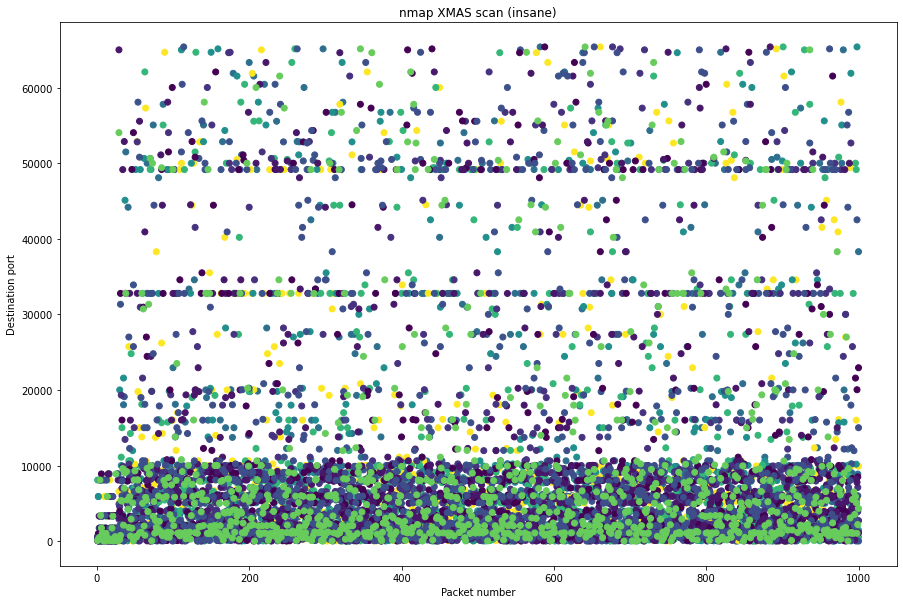

In [17]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [18]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [19]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

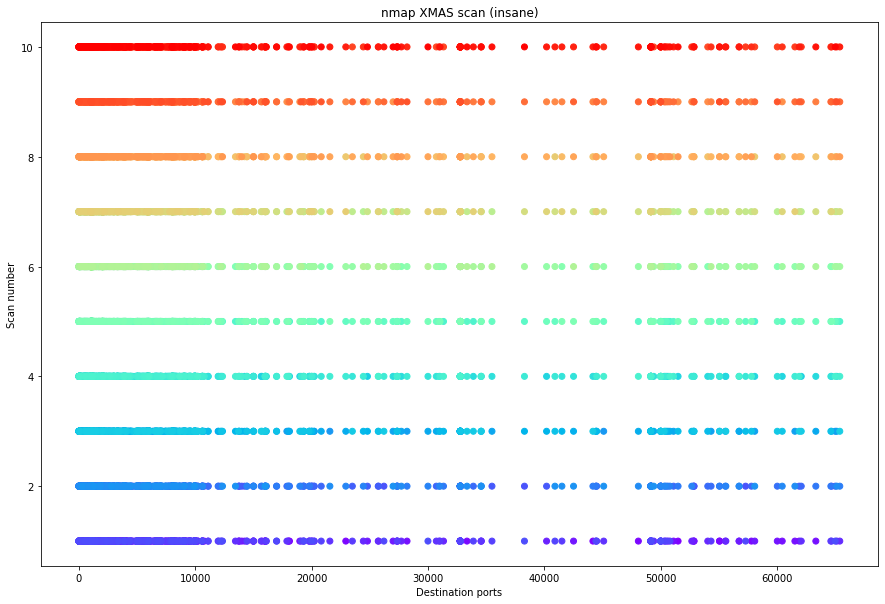

In [20]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [21]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

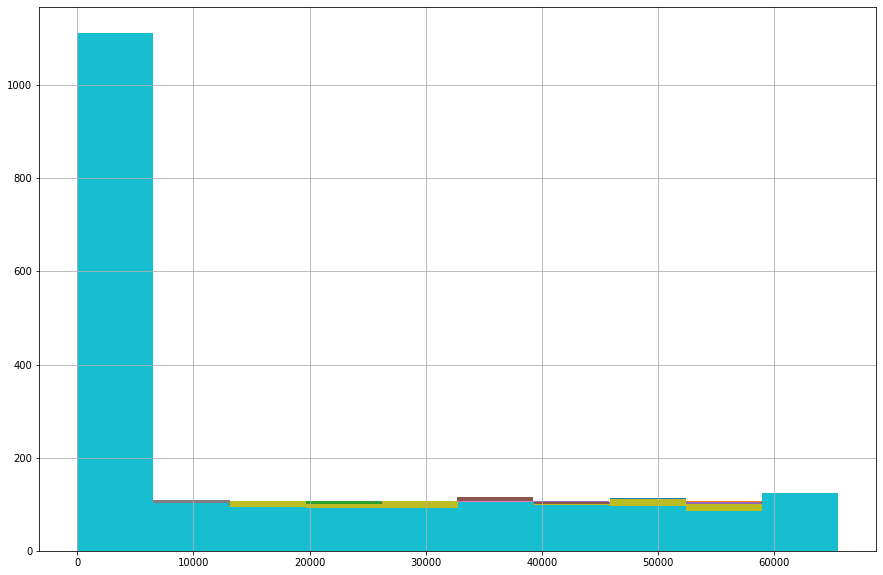

In [22]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

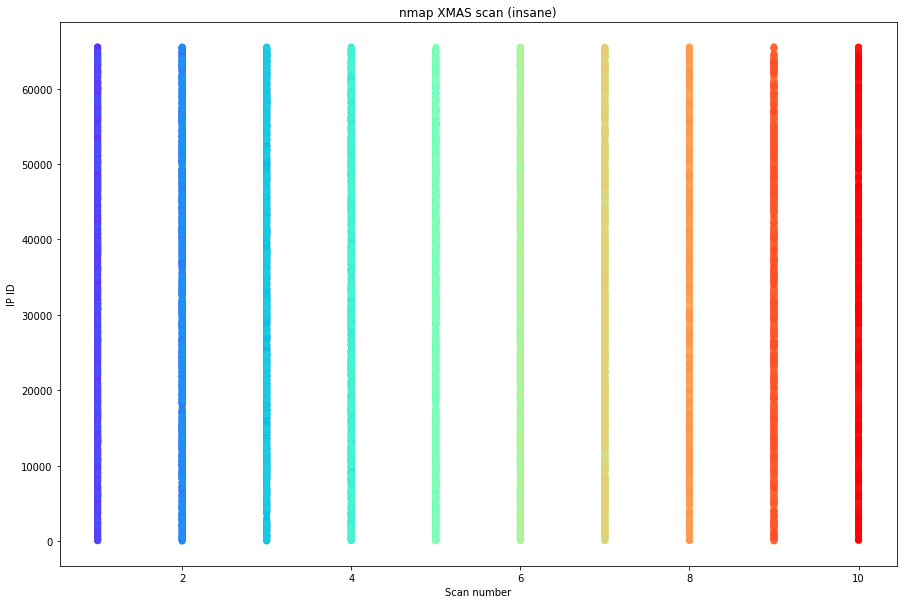

In [23]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


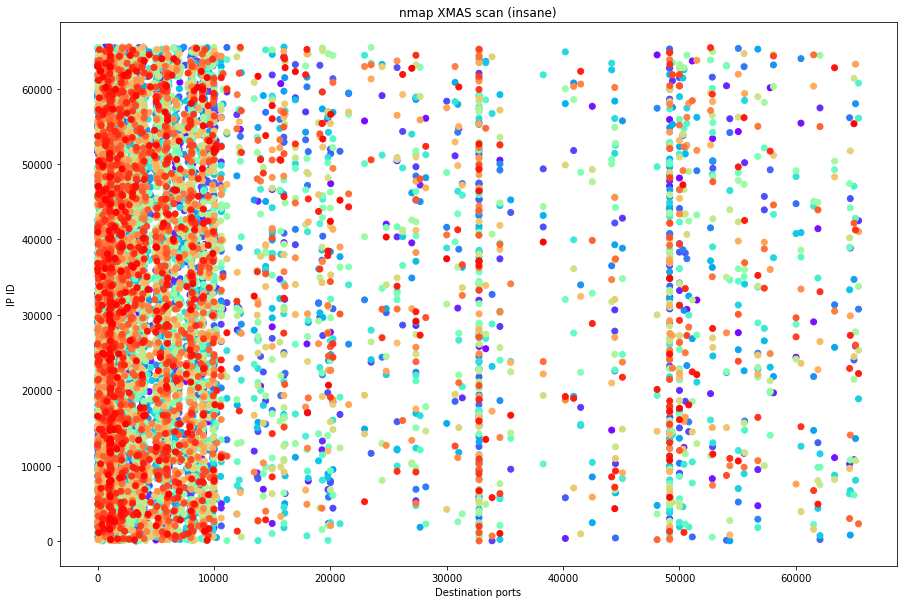

In [24]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

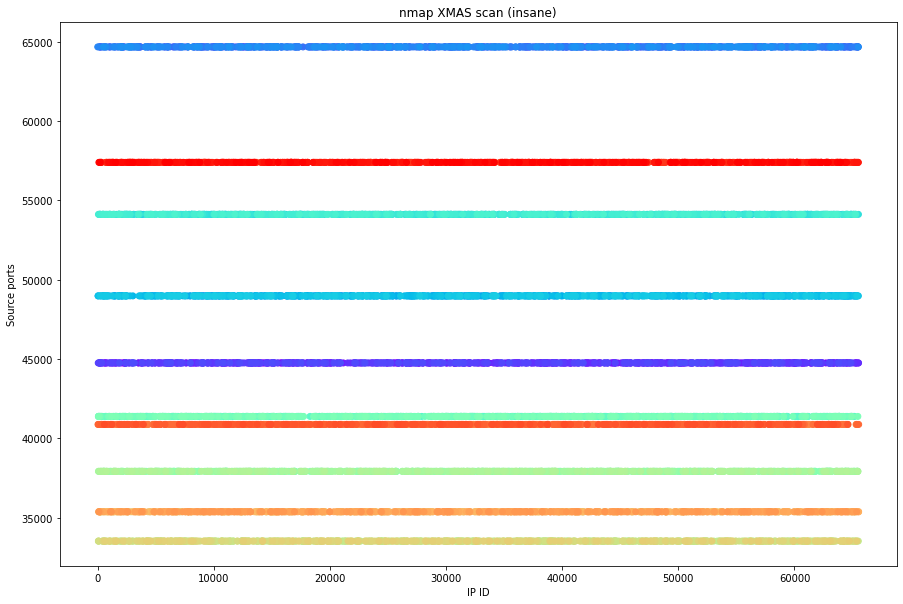

In [25]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [27]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 160

Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 1605476926
Sequence number: 160

Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 4282219388
Sequence number: 428

Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 125

Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 1258677795
Sequence number: 125

Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 1994007282
Sequence number: 199

Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 3165938919
Sequence number: 316

Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
S

Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
Sequence number: 444993125
S

Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 1408072123
Sequence number: 140

Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 2062984611
Sequence number: 206

Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 419

Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 4197953591
Sequence number: 419

Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
Sequence number: 163396790
S

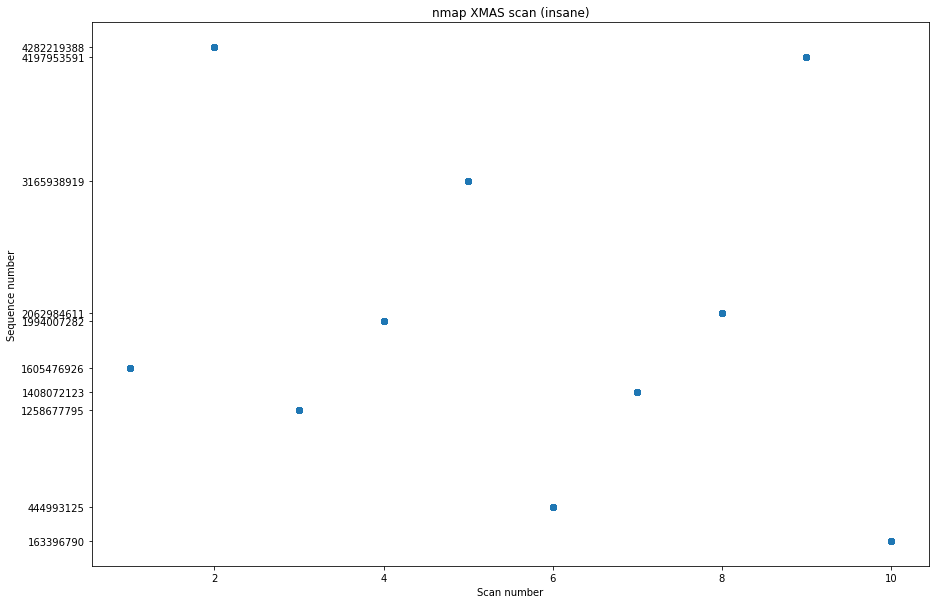

In [29]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


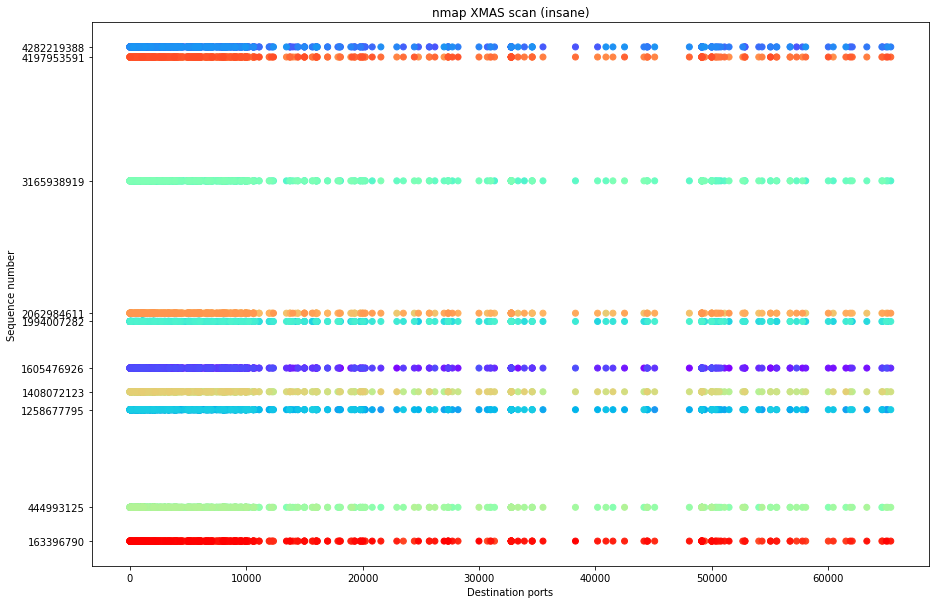

In [30]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

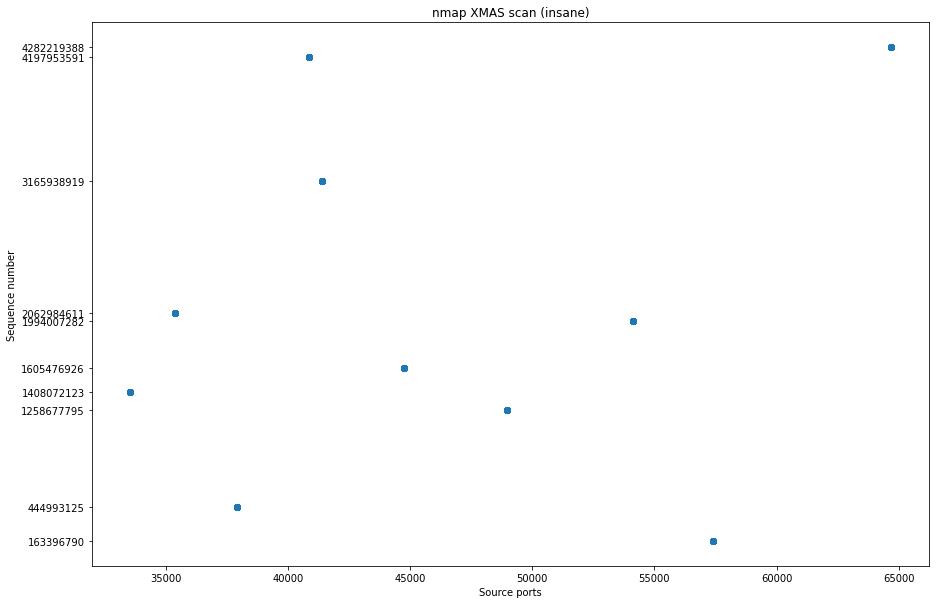

In [31]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [32]:
len(set(orders_port['sport']))

10

## Flags

In [33]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU